In [1]:
from keras.models import Sequential       # Temel Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization   # Cnn layer'ları
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical     
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_and_preprocess(data_path):
    data= pd.read_csv(data_path)   # parametre olarak gelen datapath okunup data'nın içerisine atılıyor.
    data= data.values            #csv olarak gelen data frame as_matrix(yeni kullanımı values oluyor) metodu ile array'e çeviriliyor.
    np.random.shuffle(data)        # bu data kendi içerisinde karıştırılıyor.
    x= data[:,1:].reshape(-1,28,28,1)/255.0       # x resim, y label, resimler reshape ediliyor kerasın kabul edeceği şekilde sonra da 255'e bölerek resim normalize ediliyor.
    y= data[:,0].astype(np.int32)                 # label'lar astype ile int'e çeviriliyor.
    y= to_categorical(y, num_classes=len(set(y))) # to_categorical kullanılarak one hot encoding yapılıyor.
    return x,y

train_data_path= "C://Users//EBRU//Desktop//deep learning//cnn-extra//mnist-project//mnist_train.csv"
test_data_path= "C://Users//EBRU//Desktop//deep learning//cnn-extra//mnist-project//mnist_test.csv"

x_train, y_train= load_and_preprocess(train_data_path)
x_test, y_test= load_and_preprocess(test_data_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


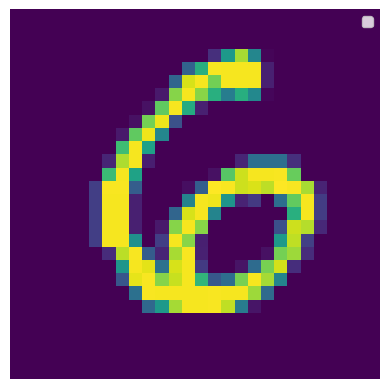

6


In [3]:
# rastgele bir index seçerek görselleştirme yapalım
index= 4
vis= x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

In [4]:
# CNN'e geçiş yapalım
numberOfClass= y_train.shape[1]  # y_train'in shape'inin 1.indexini alırsak class sayısını elde etmiş oluruz.

model= Sequential()
# ilk layer'ımızı yaratalım
model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

# ikinci layer'ımızı yaratalım
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())


# üçüncü layer'ımızı yaratalım
model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=512))
model.add(Activation("relu"))
model.add(Dense(units=250))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units= numberOfClass))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

# train
hist= model.fit(x_train,y_train, validation_data=(x_test,y_test),
               epochs=40, batch_size=3000)

Epoch 1/40
20/20 [==============================] - 37s 2s/step - loss: 0.8502 - accuracy: 0.7407 - val_loss: 1.9953 - val_accuracy: 0.2508
Epoch 2/40
20/20 [==============================] - 35s 2s/step - loss: 0.1868 - accuracy: 0.9424 - val_loss: 2.7227 - val_accuracy: 0.1135
Epoch 3/40
20/20 [==============================] - 36s 2s/step - loss: 0.1141 - accuracy: 0.9651 - val_loss: 3.3139 - val_accuracy: 0.1135
Epoch 4/40
20/20 [==============================] - 35s 2s/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 4.0041 - val_accuracy: 0.1135
Epoch 5/40
20/20 [==============================] - 38s 2s/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 4.9512 - val_accuracy: 0.1135
Epoch 6/40
20/20 [==============================] - 41s 2s/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 5.3293 - val_accuracy: 0.1135
Epoch 7/40
20/20 [==============================] - 39s 2s/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 6.1228 - val_accuracy: 0.1135
Epoch 8/40
20/20 [==

In [5]:
model.save_weights("mnist_record.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


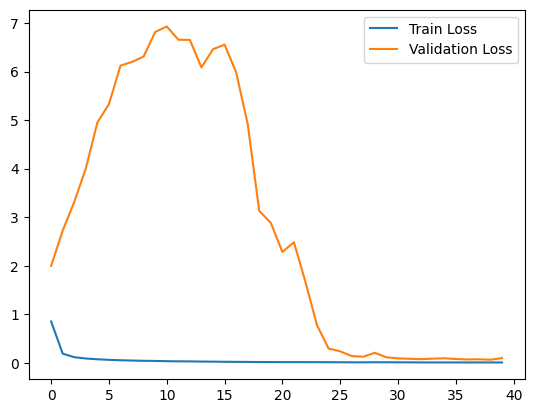

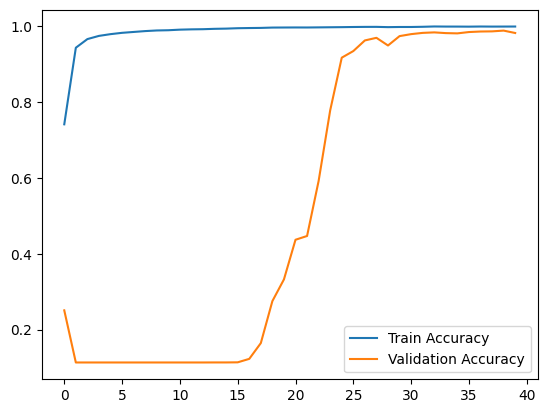

In [6]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [7]:
import json
with open('mnist_record.json',"w") as f:
    json.dump(hist.history, f)

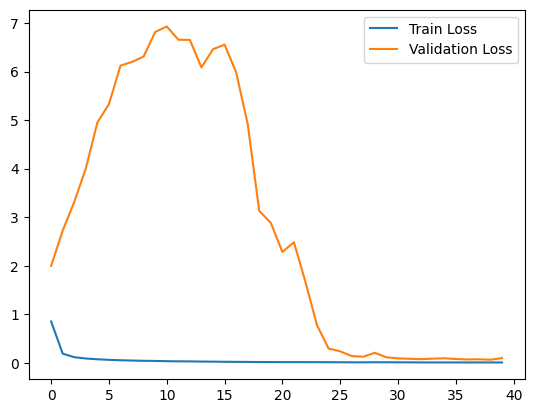

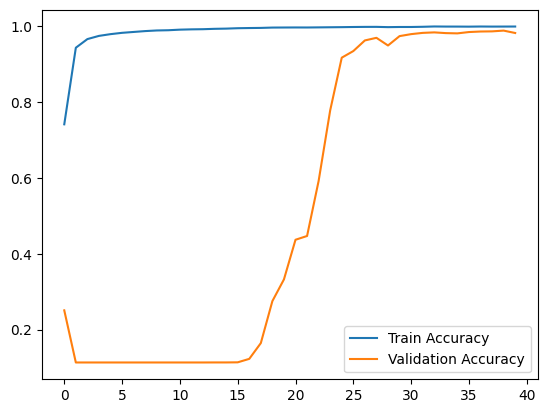

In [8]:
import codecs
with codecs.open("mnist_record.json",'r', encoding='utf-8') as f:
    h= json.loads(f.read())

plt.figure()
plt.plot(h["loss"], label="Train Loss")
plt.plot(h["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label="Train Accuracy")
plt.plot(h["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()